In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



df = pd.read_csv("RankingT.csv")

print(df.shape)
print(df.head())
print(df.info())
print(df.describe())



(600, 5)
   id  id_filme  nota  posicao        data
0   1         1  10.0        1  2025-11-01
1   2        16   9.2        2  2025-11-01
2   3         6   9.0        3  2025-11-01
3   4        19   8.8        4  2025-11-01
4   5         4   8.8        5  2025-11-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        600 non-null    int64  
 1   id_filme  600 non-null    int64  
 2   nota      600 non-null    float64
 3   posicao   600 non-null    int64  
 4   data      600 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 23.6+ KB
None
               id    id_filme        nota     posicao
count  600.000000  600.000000  600.000000  600.000000
mean   300.500000   10.500000    5.583667   10.500000
std    173.349358    5.771093    2.463612    5.771093
min      1.000000    1.000000    0.000000    1.000000
25%    150.750000 

In [3]:
#verificação de valores nulos
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\nValores nulos por coluna:\n", df.isnull().sum())


Valores nulos por coluna:
 id          0
id_filme    0
nota        0
posicao     0
data        0
dtype: int64


In [4]:
#pré-processamento:

#aqui ta ocorrendo o tratamento data, por se tratar de um dado categorico.

# 2. Converter a coluna 'data' para datetime ANTES de calcular o mínimo
df['data'] = pd.to_datetime(df['data'])
data_inicial = df['data'].min()
df['dias_desde_inicio'] = (df['data'] - data_inicial).dt.days




In [5]:
#definição target e feature
y=df['nota']
X=df[['posicao']]

In [6]:
#treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# 6. Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Previsões separadas para treino e teste
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

coeficiente = modelo.coef_[0]

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n>> RESULTADOS REGRESSÃO LINEAR - TREINO:")
print(f"R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")

print("\n>> RESULTADOS REGRESSÃO LINEAR - TESTE:")
print(f"R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")



>> RESULTADOS REGRESSÃO LINEAR - TREINO:
R²: 0.889
RMSE: 0.82
MAE: 0.67

>> RESULTADOS REGRESSÃO LINEAR - TESTE:
R²: 0.883
RMSE: 0.82
MAE: 0.67


In [9]:
# Exemplo de Previsão: Qual a nota esperada para a posicao 5?
posicao_previsao = 5
predicao = modelo.predict(np.array([[posicao_previsao]]))

print(f"\nPrevisão de Nota para Posição {posicao_previsao}: {predicao[0]:.4f}")


Previsão de Nota para Posição 5: 7.7975


c:\Users\maria.souza.2004\Documents\GitHub\Machine-Learning-Projetos\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: >

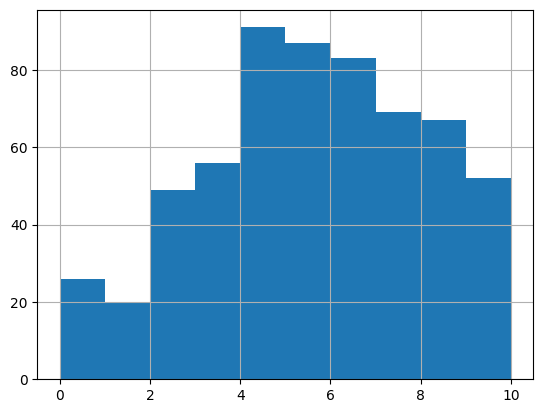

In [10]:
df['nota'].hist()


>> RESULTADOS REGRESSÃO LINEAR - TREINO:
R²: 0.890
RMSE: 0.82
MAE: 0.67

>> RESULTADOS REGRESSÃO LINEAR - TESTE:
R²: 0.881
RMSE: 0.83
MAE: 0.67

>> EQUAÇÃO DA RETA:
Nota = 9.859 + (-0.404 × Posição)


c:\Users\maria.souza.2004\Documents\GitHub\Machine-Learning-Projetos\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


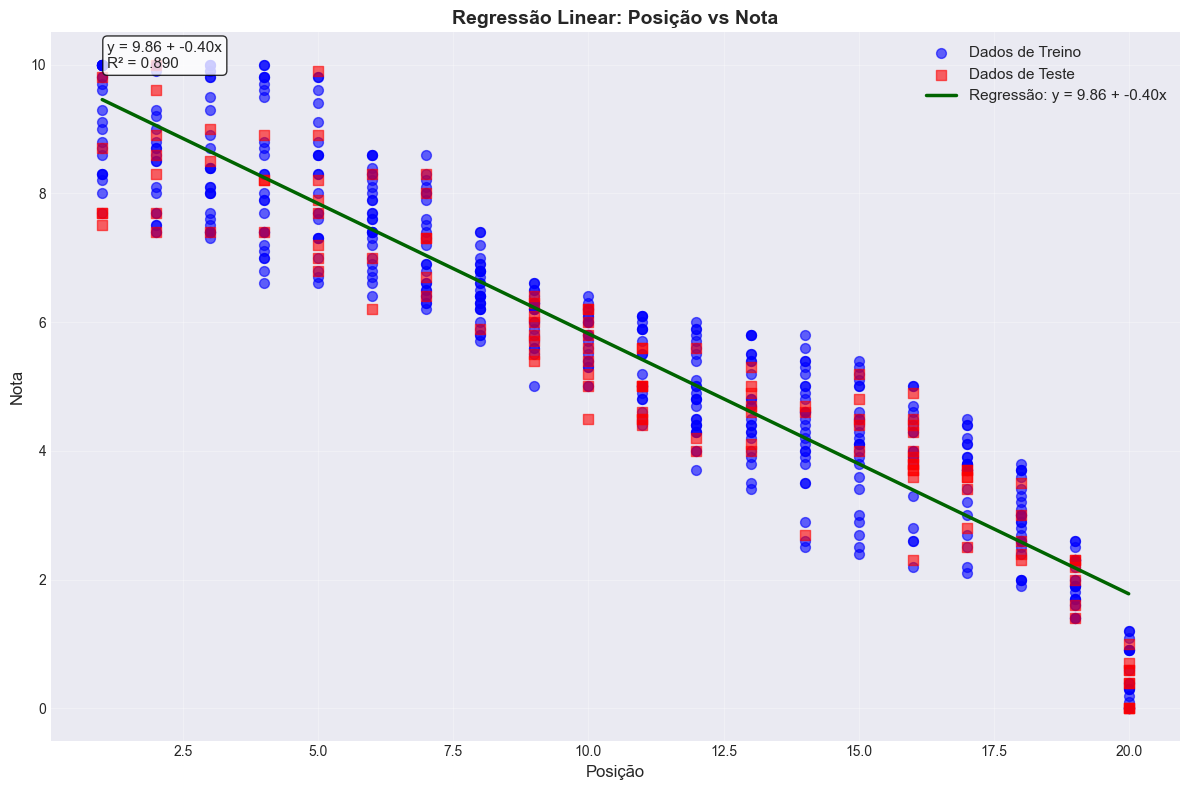

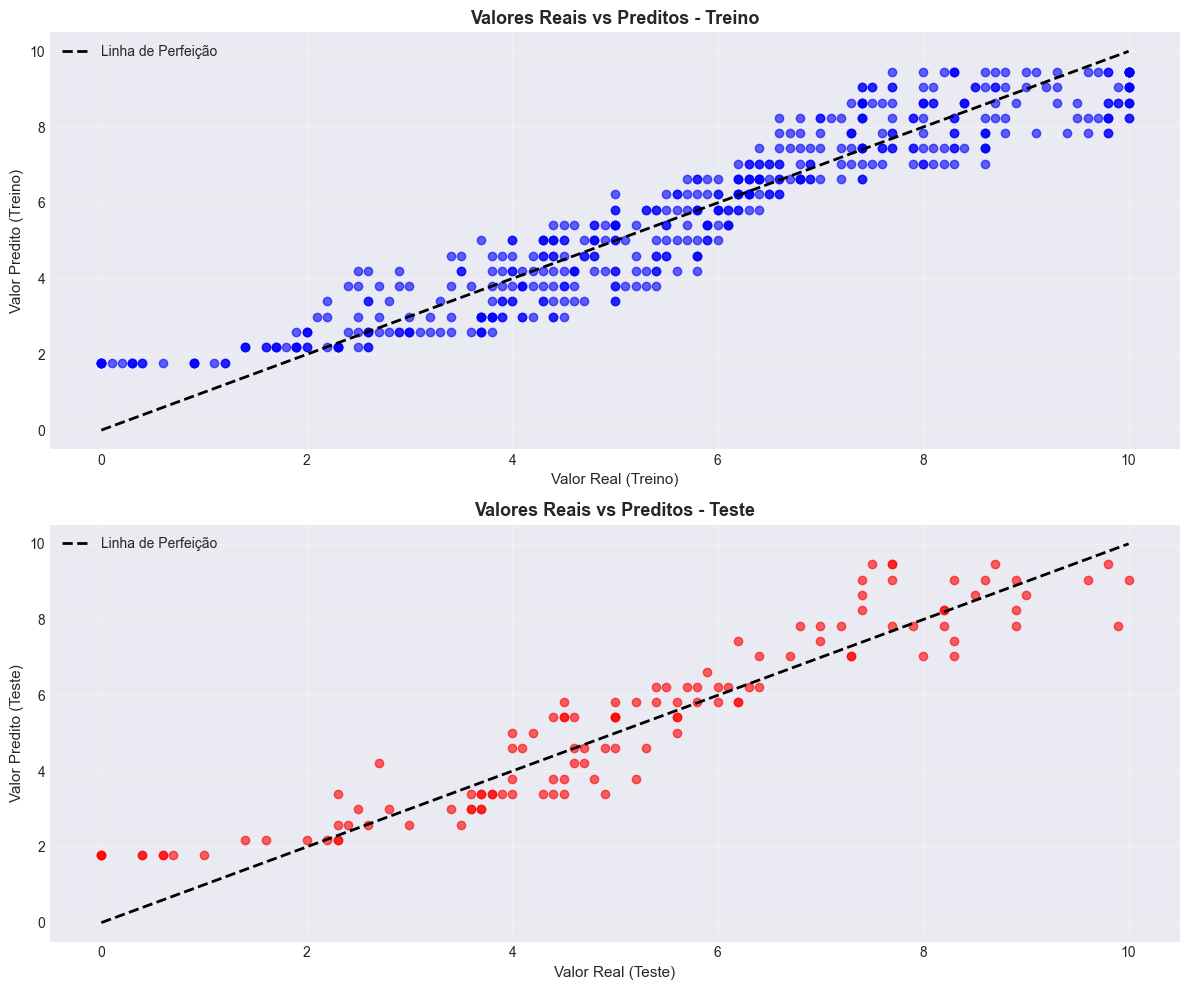

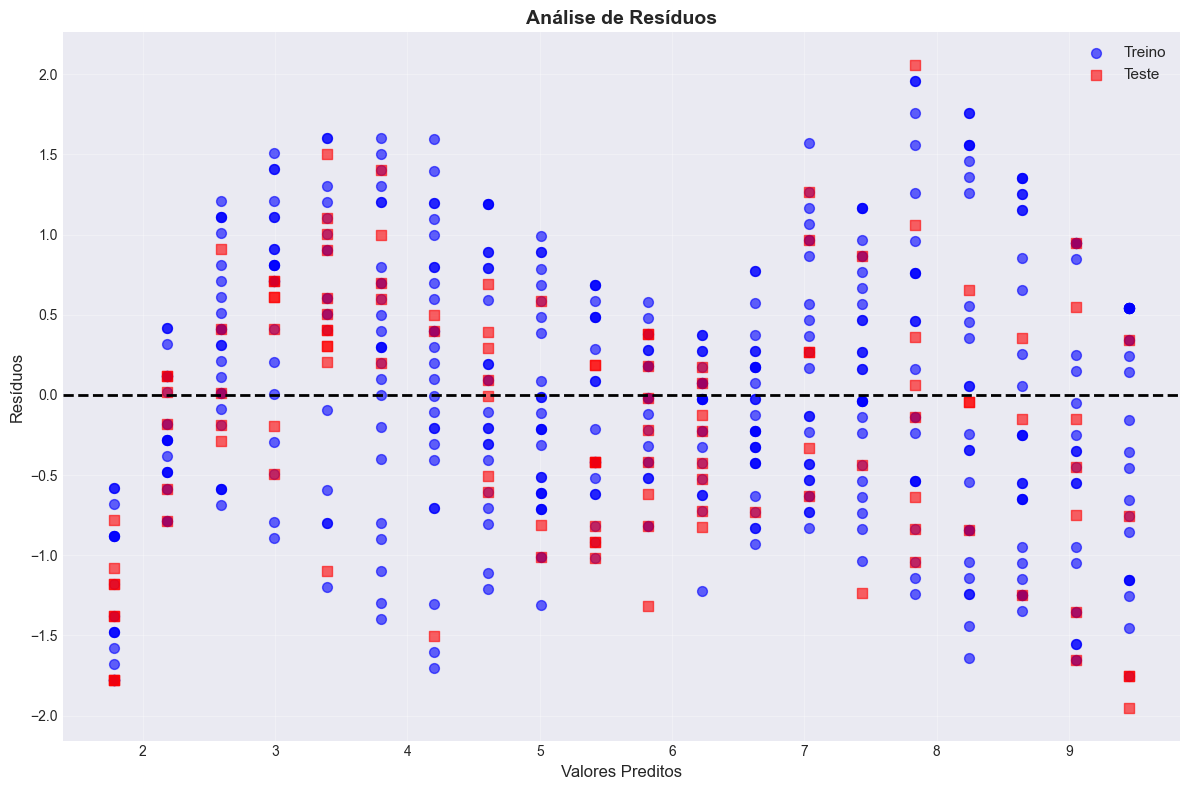

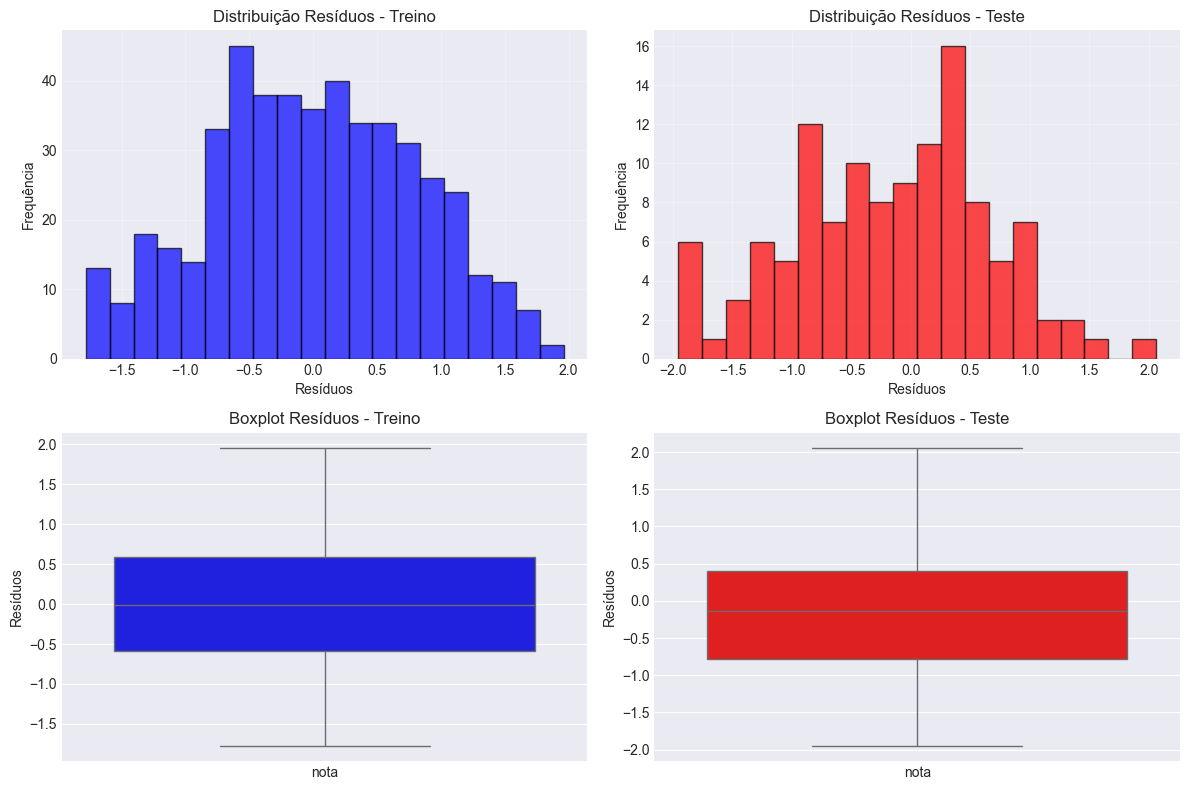

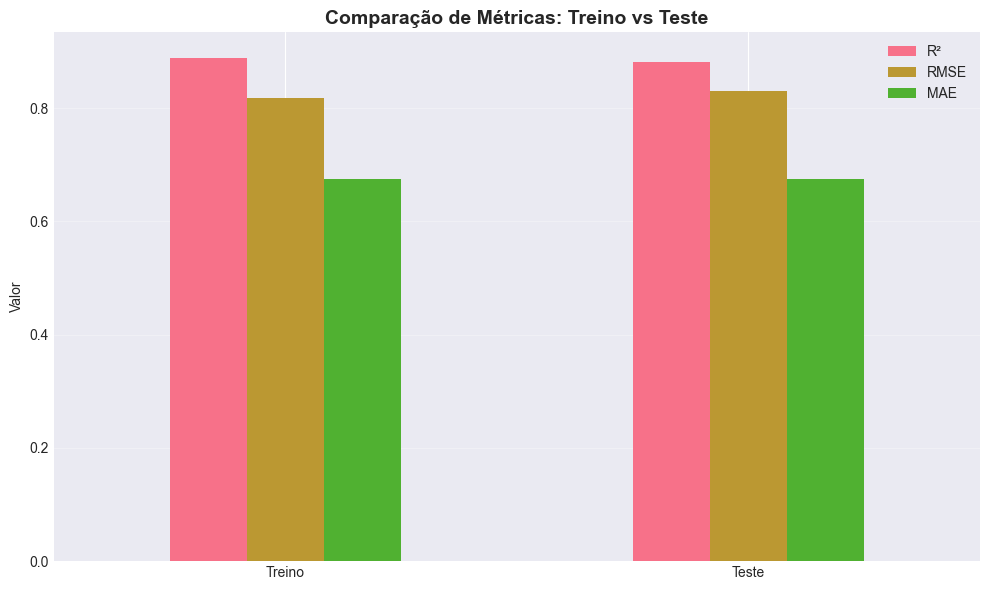


MÉTRICAS COMPARATIVAS:
           R²   RMSE    MAE
Treino  0.890  0.818  0.674
Teste   0.881  0.831  0.675


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Carregar os dados
df = pd.read_csv("RankingT.csv")

# Preparar os dados
df['data'] = pd.to_datetime(df['data'])
data_inicial = df['data'].min()
df['dias_desde_inicio'] = (df['data'] - data_inicial).dt.days

y = df['nota']
X = df[['posicao']]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsões
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Coeficientes
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Resultados
print("\n>> RESULTADOS REGRESSÃO LINEAR - TREINO:")
print(f"R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")

print("\n>> RESULTADOS REGRESSÃO LINEAR - TESTE:")
print(f"R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")

print(f"\n>> EQUAÇÃO DA RETA:")
print(f"Nota = {intercepto:.3f} + ({coeficiente:.3f} × Posição)")

# ========== GRÁFICO 1: Dispersão com linha de regressão ==========
plt.figure(figsize=(12, 8))

# Gráfico de dispersão com cores diferentes para treino e teste
plt.scatter(X_train, y_train, alpha=0.6, s=50, label='Dados de Treino', color='blue')
plt.scatter(X_test, y_test, alpha=0.6, s=50, label='Dados de Teste', color='red', marker='s')

# Linha de regressão
x_range = np.linspace(X['posicao'].min(), X['posicao'].max(), 100)
y_range = modelo.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range, color='darkgreen', linewidth=2.5, 
         label=f'Regressão: y = {intercepto:.2f} + {coeficiente:.2f}x')

plt.xlabel('Posição', fontsize=12)
plt.ylabel('Nota', fontsize=12)
plt.title('Regressão Linear: Posição vs Nota', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Adicionar equação da reta no gráfico
eq_text = f'y = {intercepto:.2f} + {coeficiente:.2f}x\nR² = {r2_score(y_train, y_pred_train):.3f}'
plt.annotate(eq_text, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=11, backgroundcolor='white',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# ========== GRÁFICO 2: Valores reais vs preditos ==========
plt.figure(figsize=(12, 10))

# Subplot 1: Dados de treino
plt.subplot(2, 1, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'k--', linewidth=2, label='Linha de Perfeição')
plt.xlabel('Valor Real (Treino)', fontsize=11)
plt.ylabel('Valor Predito (Treino)', fontsize=11)
plt.title('Valores Reais vs Preditos - Treino', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Dados de teste
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'k--', linewidth=2, label='Linha de Perfeição')
plt.xlabel('Valor Real (Teste)', fontsize=11)
plt.ylabel('Valor Predito (Teste)', fontsize=11)
plt.title('Valores Reais vs Preditos - Teste', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========== GRÁFICO 3: Resíduos ==========
plt.figure(figsize=(12, 8))

# Calcular resíduos
residuos_train = y_train - y_pred_train
residuos_test = y_test - y_pred_test

plt.scatter(y_pred_train, residuos_train, alpha=0.6, s=50, label='Treino', color='blue')
plt.scatter(y_pred_test, residuos_test, alpha=0.6, s=50, label='Teste', color='red', marker='s')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Valores Preditos', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)
plt.title('Análise de Resíduos', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========== GRÁFICO 4: Distribuição dos resíduos ==========
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(residuos_train, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribuição Resíduos - Treino', fontsize=12)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(residuos_test, bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribuição Resíduos - Teste', fontsize=12)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
sns.boxplot(data=[residuos_train], color='blue')
plt.title('Boxplot Resíduos - Treino')
plt.ylabel('Resíduos')

plt.subplot(2, 2, 4)
sns.boxplot(data=[residuos_test], color='red')
plt.title('Boxplot Resíduos - Teste')
plt.ylabel('Resíduos')

plt.tight_layout()
plt.show()

# ========== GRÁFICO 5: Métricas de desempenho ==========
metricas = {
    'R²': [r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_pred_train)), 
             np.sqrt(mean_squared_error(y_test, y_pred_test))],
    'MAE': [mean_absolute_error(y_train, y_pred_train), 
            mean_absolute_error(y_test, y_pred_test)]
}

df_metricas = pd.DataFrame(metricas, index=['Treino', 'Teste'])

plt.figure(figsize=(10, 6))
df_metricas.plot(kind='bar', ax=plt.gca())
plt.title('Comparação de Métricas: Treino vs Teste', fontsize=14, fontweight='bold')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MÉTRICAS COMPARATIVAS:")
print("="*60)
print(df_metricas.round(3))